In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plot
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [14]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#Data Visulization and Analysis

<Axes: >

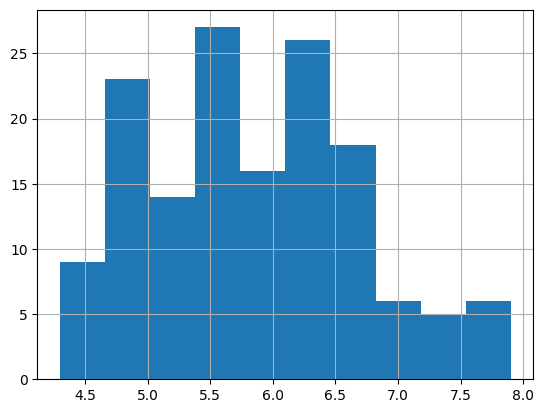

In [15]:
#histogram
data["sepal_length"].hist()

<Axes: >

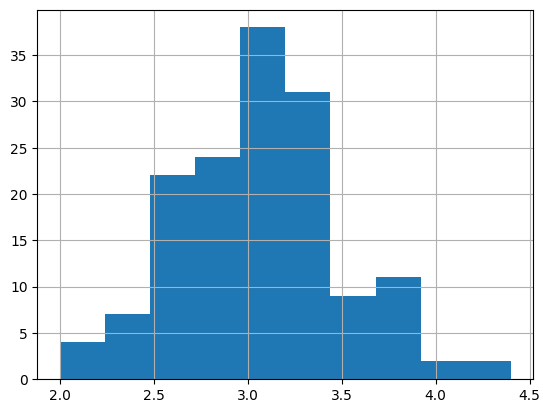

In [16]:
data["sepal_width"].hist()

<Axes: >

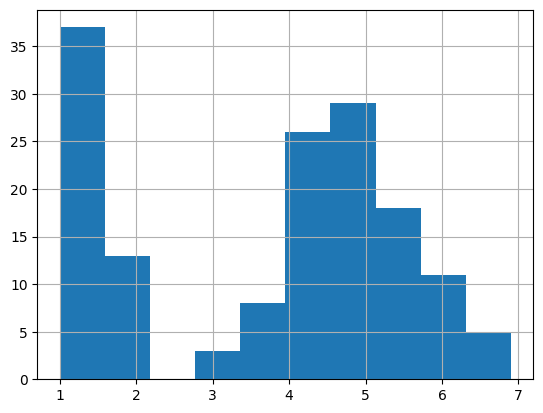

In [17]:
data["petal_length"].hist()

<Axes: >

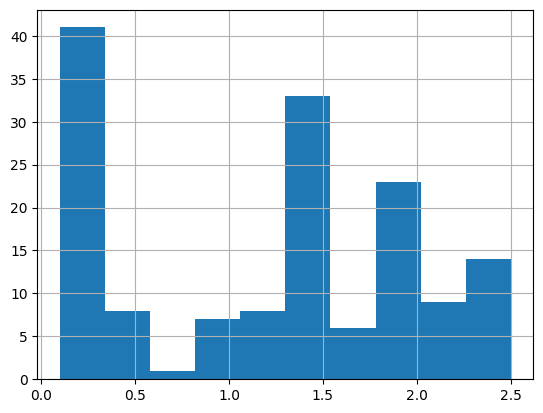

In [18]:
data["petal_width"].hist()

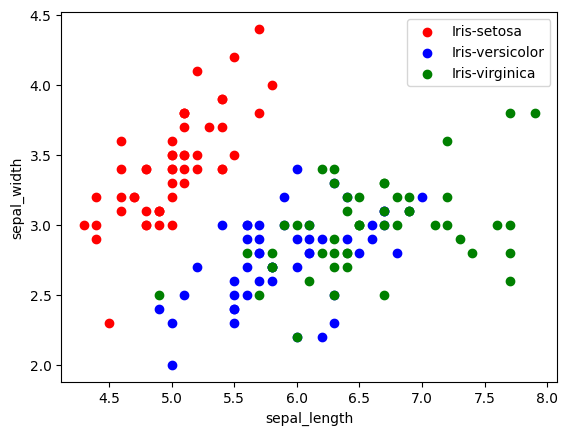

In [19]:
#scatter_plots

colors = ["Red", "Blue", "Green"]
species = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

for i in range(3):
    x = data[data["species"] == species[i]]
    plot.scatter(x["sepal_length"], x["sepal_width"], c = colors[i], label = species[i])
plot.xlabel("sepal_length")
plot.ylabel("sepal_width")
plot.legend()

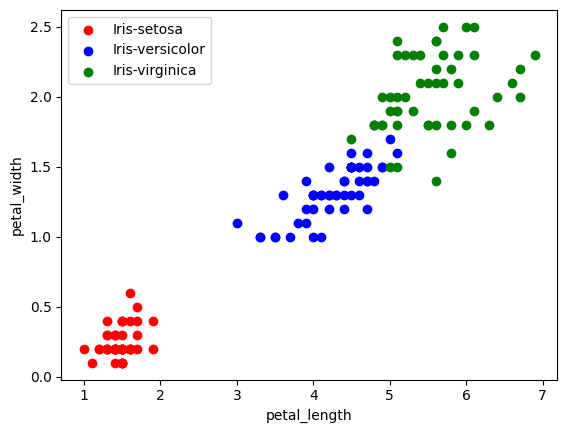

In [20]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plot.scatter(x["petal_length"], x["petal_width"], c = colors[i], label = species[i])
plot.xlabel("petal_length")
plot.ylabel("petal_width")
plot.legend()

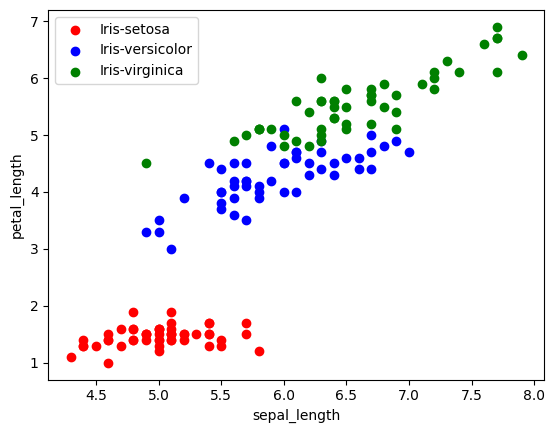

In [21]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plot.scatter(x["sepal_length"], x["petal_length"], c = colors[i], label = species[i])
plot.xlabel("sepal_length")
plot.ylabel("petal_length")
plot.legend()

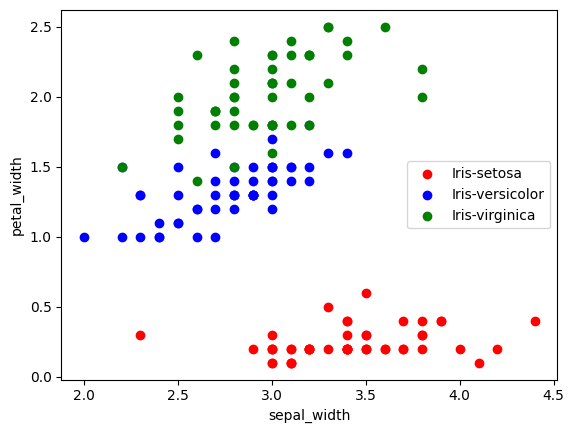

In [22]:
for i in range(3):
    x = data[data["species"] == species[i]]
    plot.scatter(x["sepal_width"], x["petal_width"], c = colors[i], label = species[i])
plot.xlabel("sepal_width")
plot.ylabel("petal_width")
plot.legend()

In [23]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [24]:
#pip install seaborn --upgrade

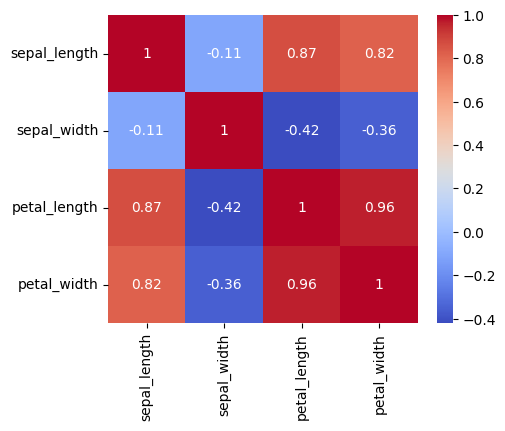

In [25]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
fig, ax = plot.subplots(figsize = (5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap='coolwarm')
plot.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = data.drop(columns=['species'])
Y = data['species']

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [29]:
print(X_train.shape)
print(Y_train.shape)

(120, 4)
(120,)


Accuracy: 1.00
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



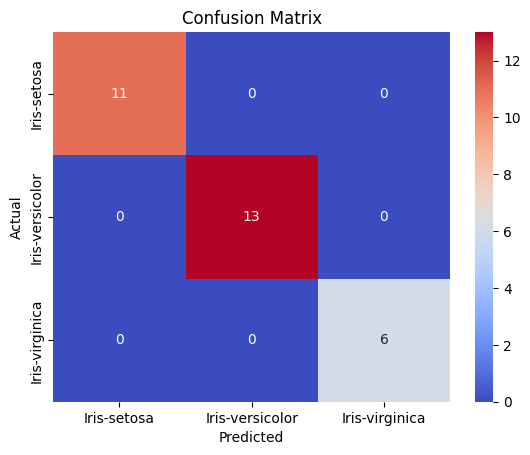

In [33]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(Y_test, Y_pred, target_names=np.unique(Y)))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.title('Confusion Matrix')
plot.show()

In [34]:
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [35]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
